In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
pd.set_option("max_columns", None)
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

PALETTE = sns.color_palette("Set2")


In [2]:
data=pd.read_csv('/Users/carrie/IronHack/Final_Project/Encoded_Data/data_encode.csv').iloc[:,1:]
data

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0             0               3        58138.0              58    635      88   
1             0               3        46344.0              38     11       1   
2             0               0        71613.0              26    426      49   
3             0               0        26646.0              26     11       4   
4             2               2        58293.0              94    173      43   
...         ...             ...            ...             ...    ...     ...   
2231          0               2        61223.0              46    709      43   
2232          2               0        64014.0              56    406       0   
2233          0               1        56981.0              91    908      48   
2234          1               0        69245.0               8    428      30   
2235          2               2        52869.0              40     84       3   

      Meat  Fish  Sweets  Gold  Discount_Deal  Web_Deal  Catalog_Deal  \
0      546   172      88    88              3         8            10   
1        6     2       1     6              2         1             1   
2      127   111      21    42              1         8             2   
3       20    10       3     5              2         2             0   
4      118    46      27    15              5         5             3   
...    ...   ...     ...   ...            ...       ...           ...   
2231   182    42     118   247              2         9             3   
2232    30     0       0     8              7         8             2   
2233   217    32      12    24              1         2             3   
2234   214    80      30    61              2         6             5   
2235    61     2       1    21              3         3             1   

      Store_Deal  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0              4                  7             0             0             0   
1              2                  5             0             0             0   
2             10                  4             0             0             0   
3              4                  6             0             0             0   
4              6                  5             0             0             0   
...          ...                ...           ...           ...           ...   
2231           4                  5             0             0             0   
2232           5                  7             0             0             0   
2233          13                  6             0             1             0   
2234          10                  3             0             0             0   
2235           4                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                0             0         0         1   57   
1                0             0         0         0   60   
2                0             0         0         0   49   
3                0             0         0         0   30   
4                0             0         0         0   33   
...            ...           ...       ...       ...  ...   
2231             0             0         0         0   47   
2232             1             0         0         0   68   
2233             0             0         0         0   33   
2234             0             0         0         0   58   
2235             0             0         0         1   60   

      Client_since_(month)  Spending  Total_Deal_nondiscount  Children  \
0                     33.2      1617                      22         0   
1                      5.0        27                       4         2   
2                     16.6       776                      20         0   
3                      3.0        53                       6         1   
4                     11.5       422                      14         1   
...   

In [3]:
# first clustering: cluster clients by spending and yearly income 

# Scale my data

In [4]:
df = data.copy()

scaler = StandardScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled_data

Education  Marital_Status  Yearly_Income  Recency_(days)     Wines  \
0     -0.869141        1.222432       0.288195        0.306856  0.983228   
1     -0.869141        1.222432      -0.262715       -0.383971 -0.871064   
2     -0.869141       -1.457331       0.917627       -0.798467  0.362159   
3     -0.869141       -1.457331      -1.182829       -0.798467 -0.871064   
4      0.977319        0.329178       0.295435        1.550344 -0.389661   
...         ...             ...            ...             ...       ...   
2231  -0.869141        0.329178       0.432299       -0.107640  1.203128   
2232   0.977319       -1.457331       0.562669        0.237773  0.302727   
2233  -0.869141       -0.564077       0.234150        1.446720  1.794481   
2234   0.054089       -1.457331       0.807015       -1.420212  0.368102   
2235   0.977319        0.329178       0.042075       -0.314889 -0.654136   

        Fruits      Meat      Fish    Sweets      Gold  Discount_Deal  \
0     1.554170  1.679746  2.461068  1.475396  0.845669       0.348738   
1    -0.636431 -0.713455 -0.650414 -0.631638 -0.729742      -0.168700   
2     0.572177 -0.177201  1.344595 -0.147262 -0.038098      -0.686137   
3    -0.560893 -0.651409 -0.503991 -0.583200 -0.748954      -0.168700   
4     0.421101 -0.217088  0.154911 -0.001950 -0.556831       1.383614   
...        ...       ...       ...       ...       ...            ...   
2231  0.421101  0.066551  0.081700  2.201960  3.900428      -0.168700   
2232 -0.661610 -0.607091 -0.687019 -0.655857 -0.691317       2.418490   
2233  0.546997  0.221666 -0.101329 -0.365231 -0.383920      -0.686137   
2234  0.093769  0.208371  0.777208  0.070707  0.326936      -0.168700   
2235 -0.586072 -0.469703 -0.650414 -0.631638 -0.441557       0.348738   

      Web_Deal  Catalog_Deal  Store_Deal  NumWebVisitsMonth  AcceptedCmp3  \
0     1.407639      2.509801   -0.552429           0.692865      -0.28041   
1    -1.110921     -0.568970   -1.167738          -0.131421      -0.28041   
2     1.407639     -0.226884    1.293496          -0.543564      -0.28041   
3    -0.751127     -0.911056   -0.552429           0.280722      -0.28041   
4     0.328256      0.115201    0.062879          -0.131421      -0.28041   
...        ...           ...         ...                ...           ...   
2231  1.767433      0.115201   -0.552429          -0.131421      -0.28041   
2232  1.407639     -0.226884   -0.244775           0.692865      -0.28041   
2233 -0.751127      0.115201    2.216459           0.280722      -0.28041   
2234  0.688050      0.799373    1.293496          -0.955707      -0.28041   
2235 -0.391333     -0.568970   -0.552429           0.692865      -0.28041   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
1        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
3        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
4        -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
...            ...           ...           ...           ...       ...   
2231     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2232     -0.284104     -0.279482      3.811532     -0.116616 -0.095001   
2233      3.519833     -0.279482     -0.262362     -0.116616 -0.095001   
2234     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   
2235     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001   

      Response       Age  Client_since_(month)  Spending  \
0     2.386338  1.016868              1.975387  1.680176   
1    -0.419052  1.273264             -1.666842 -0.962202   
2    -0.419052  0.333146             -0.168620  0.282541   
3    -0.419052 -1.290693             -1.925156 -0.918994   
4    -0.419052 -1.034298             -0.827321 -0.305762   
...        ...       ...                  

# 1st cluster by income & spending using KMEANS

In [5]:
df1 = data[['Yearly_Income','Spending']]

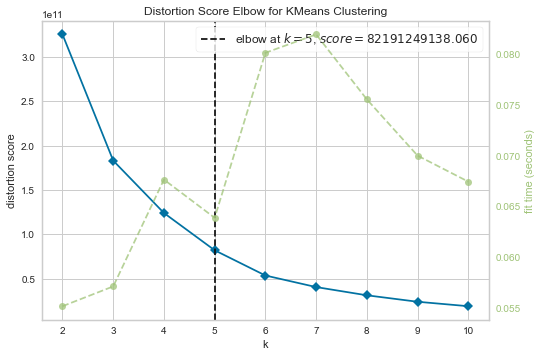

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(df1)
elbow_method.show()
# it shown that when K=4, the cluster is the most optimal

In [7]:
model = KMeans(n_clusters=4).fit(df1)
df['cluster_income_spending'] = model.predict(df1)+1
df['cluster_income_spending'].value_counts()

2    689
4    675
1    459
3    413
Name: cluster_income_spending, dtype: int64

In [8]:
pred1 = model.fit_predict(df1)
score1 = silhouette_score(df1, pred1)
score1

0.525013161304679

In [9]:
clst1_freq = df[['cluster_income_spending','Yearly_Income']].groupby('cluster_income_spending').agg('count')
clst1_freq=clst1_freq.rename(columns={'Yearly_Income':'Frequency'})
clst1_freq

Frequency
cluster_income_spending           
1                              459
2                              689
3                              413
4                              675

In [10]:
fig = px.bar(clst1_freq, x=clst1_freq.index, y=clst1_freq['Frequency'], barmode='group')
fig.show()

In [11]:
fig = px.scatter(df, x="Yearly_Income", y="Spending", color='cluster_income_spending',size='Spending', width=800, height=800)
fig.show()

<Figure size 1008x576 with 0 Axes>

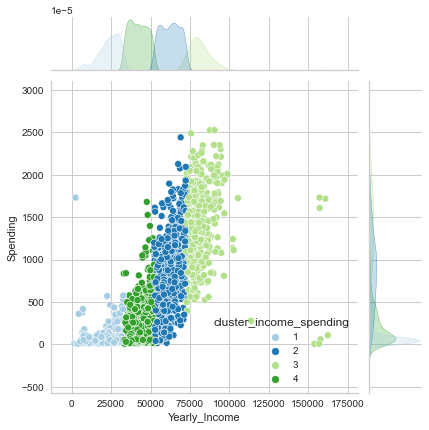

In [12]:
plt.figure(figsize=(14,8))
sns.jointplot(x=df["Yearly_Income"], y=df["Spending"], hue=df["cluster_income_spending"],palette=sns.color_palette('Paired', n_colors=4))

In [13]:
#Group 1: low spend - high income
#Group 2: high spend - high income
#Group 3: low spend - low income
#Group 4: low spend - avg income

In [14]:
cat_clust =df[['cluster_income_spending','Wines','Meat','Fish','Fruits','Sweets','Gold']].groupby('cluster_income_spending',as_index=False).agg('mean')
cat_clust

cluster_income_spending       Wines        Meat       Fish     Fruits  \
0                        1   18.028322   21.640523   8.444444   5.836601   
1                        2  468.210450  200.355588  48.670537  35.269956   
2                        3  653.973366  466.905569  91.421308  64.157385   
3                        4  117.134815   48.244444  12.983704   7.816296   

      Sweets       Gold  
0   5.773420  16.429194  
1  35.306241  62.631350  
2  67.661017  71.409201  
3   8.343704  26.903704

In [15]:
fig = px.bar(cat_clust, x='cluster_income_spending', y=['Wines','Meat','Fish','Fruits','Sweets','Gold'], title="avg catogories spending per cluster")
fig.show()

# for Wine & Meat, cluster 2 spent the most in average, then cluster 4

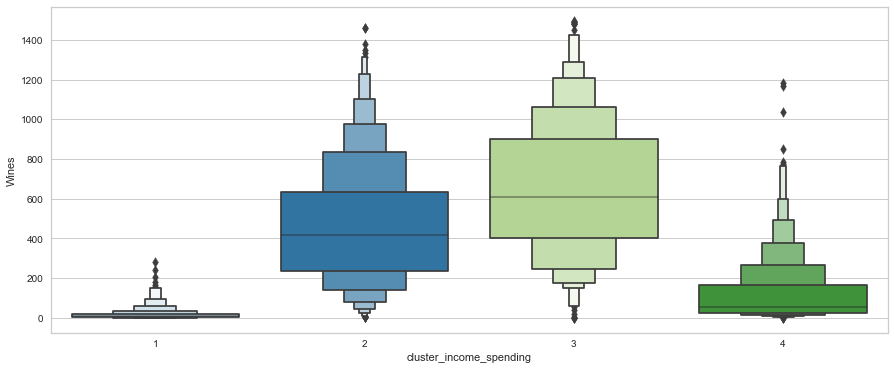

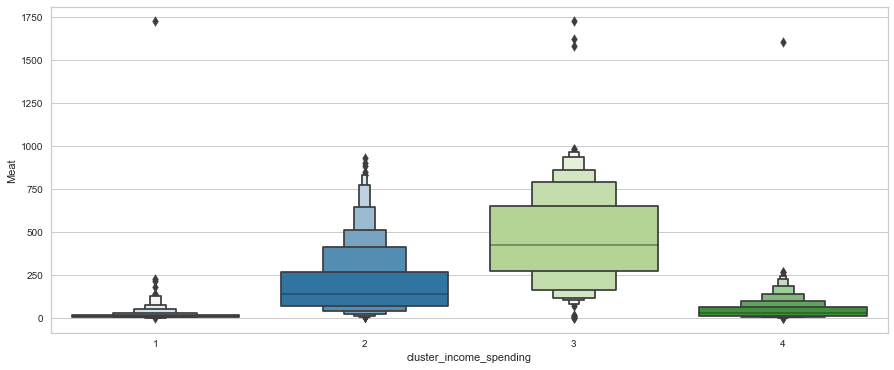

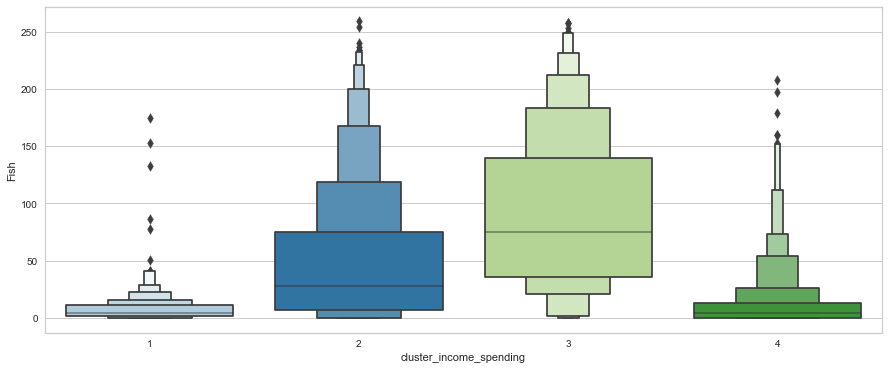

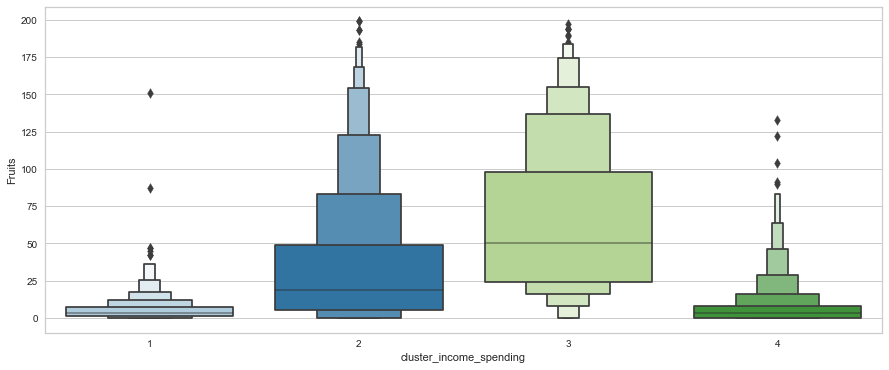

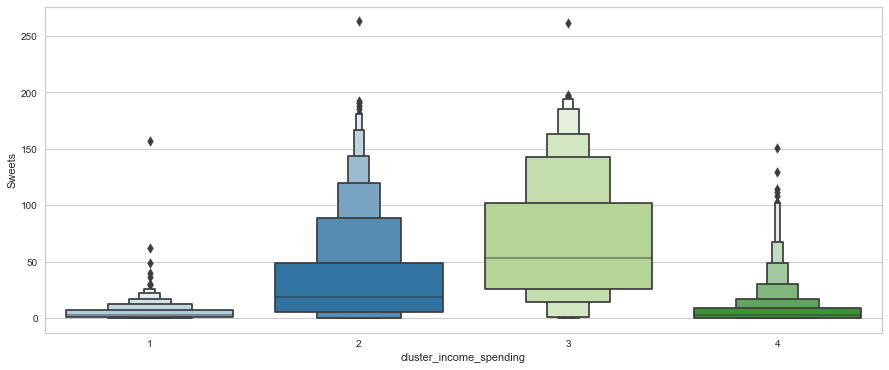

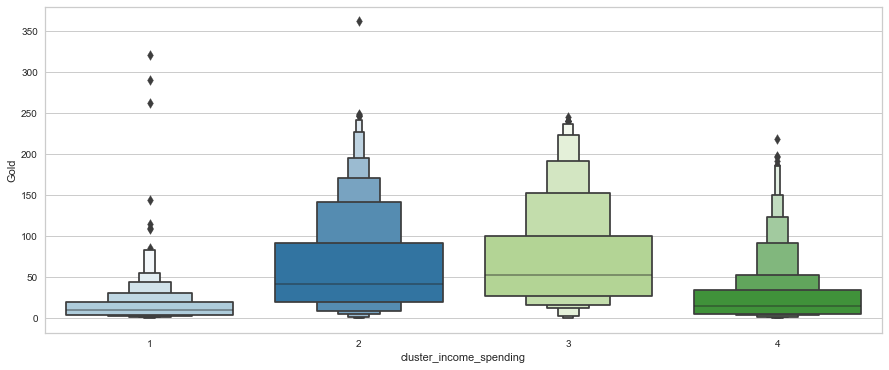

In [16]:
cat = ['Wines','Meat','Fish','Fruits','Sweets','Gold']

for i in cat:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x="cluster_income_spending", y=i,data=df, palette="Paired")

# gold: cluster 2 & 4 have almost the same spending 


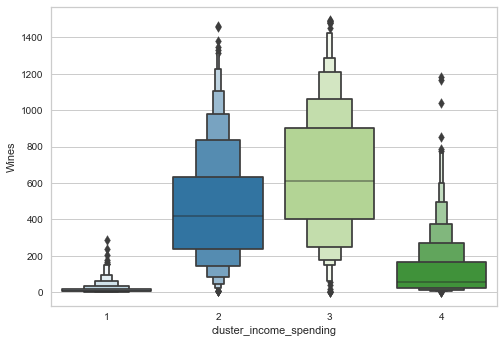

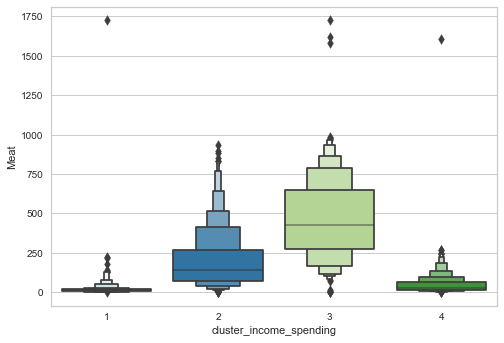

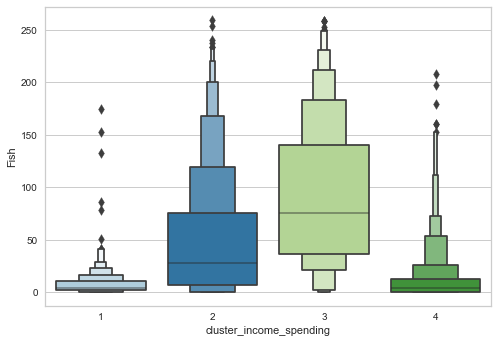

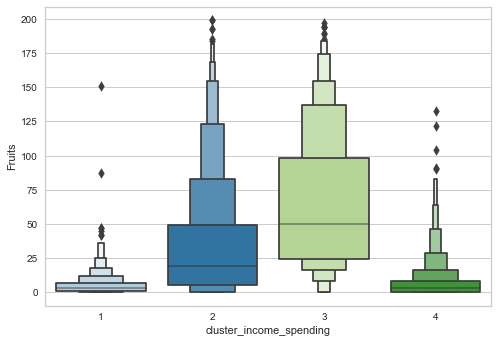

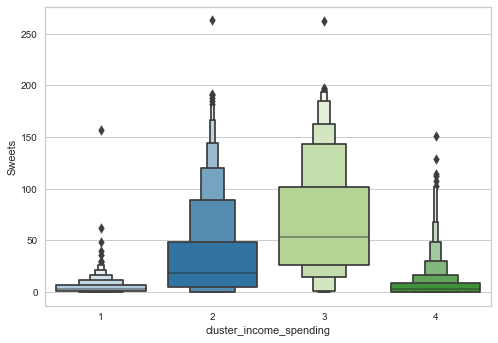

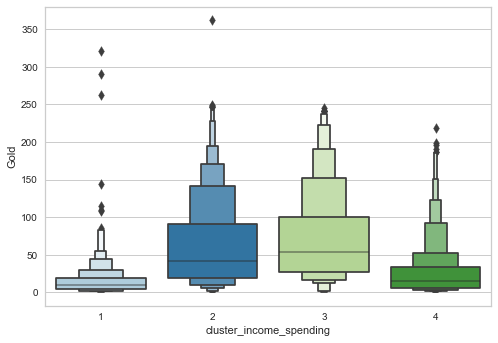

In [17]:
cat = ['Wines','Meat','Fish','Fruits','Sweets','Gold']

for i in cat:
    sns.boxenplot(x="cluster_income_spending", y=i,data=df, palette="Paired")
    plt.show()

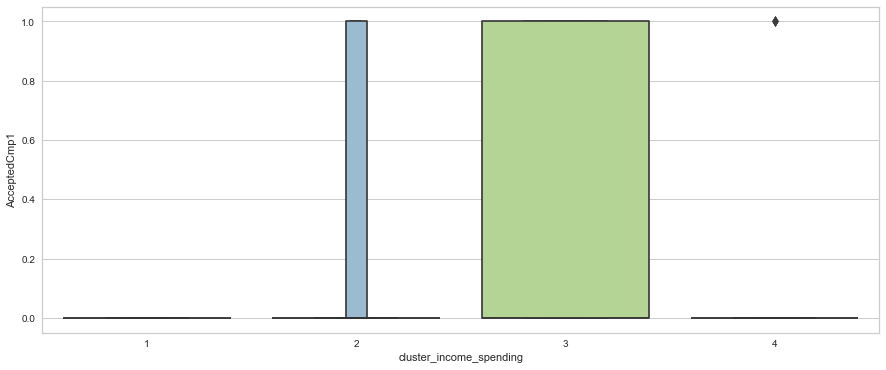

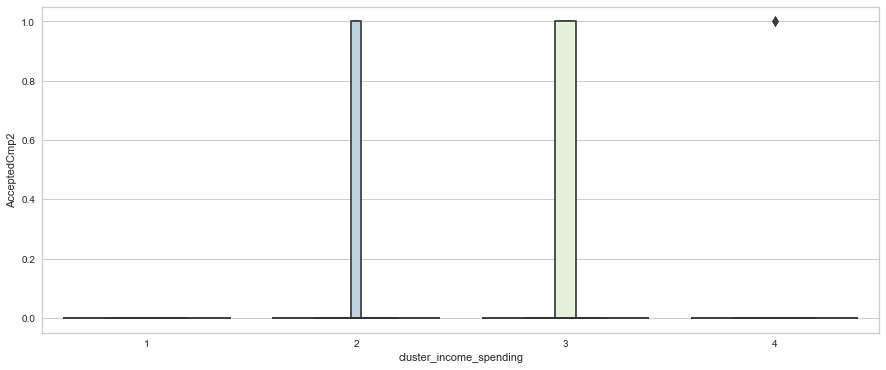

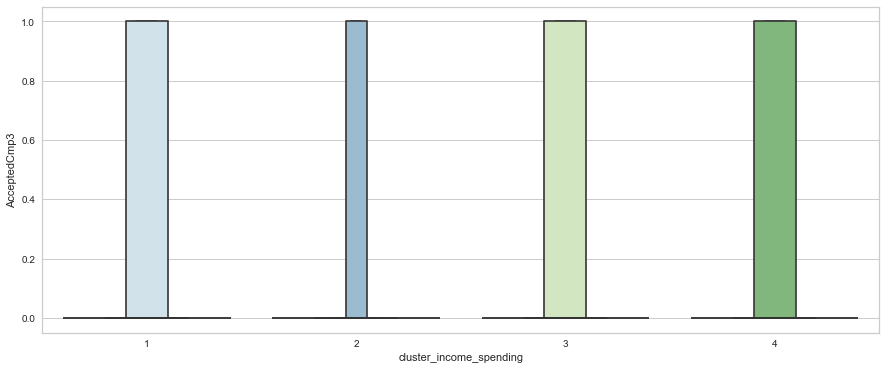

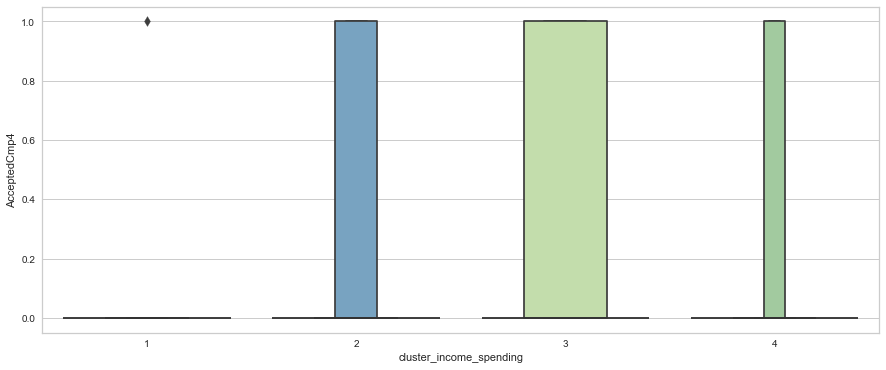

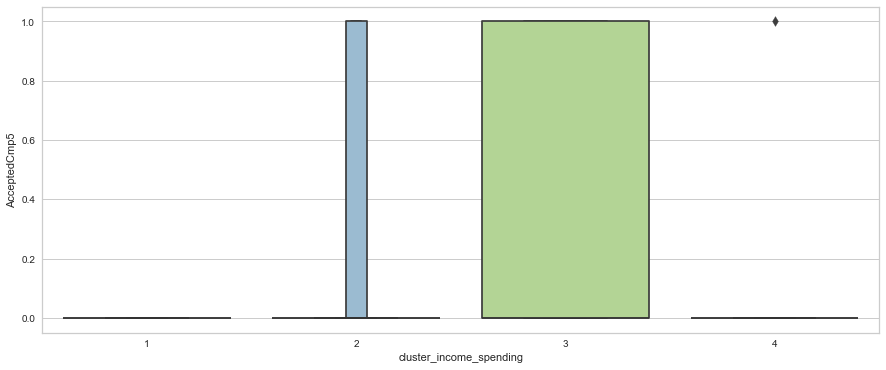

In [18]:
camp = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
for i in camp:
    plt.figure(figsize=(15,6))
    sns.boxenplot(x="cluster_income_spending", y=i,data=df, palette="Paired")

# group 1&3 not quite accepted campaignes given this way of clustering
# camp 3 is more accepted by all clusters
# camp 1 & 4 workd very well for cluster 2

In [19]:
#clst1_total_camp = df[['cluster_income_spending','total_cmp_accepted','Yearly_Income']].groupby(['cluster_income_spending','total_cmp_accepted']).agg('count')
clst1_total_camp = df[['cluster_income_spending','total_cmp_accepted','Yearly_Income']].pivot_table(index='cluster_income_spending', columns='total_cmp_accepted', values='Yearly_Income', aggfunc='count')
clst1_camp=clst1_total_camp.rename(columns={'Yearly_Income':'freq'})
clst1_camp

total_cmp_accepted           0      1     2     3     4
cluster_income_spending                                
1                        421.0   38.0   NaN   NaN   NaN
2                        555.0  105.0  23.0   5.0   1.0
3                        206.0  106.0  53.0  38.0  10.0
4                        592.0   75.0   7.0   1.0   NaN

Text(0, 0.5, 'frequency')

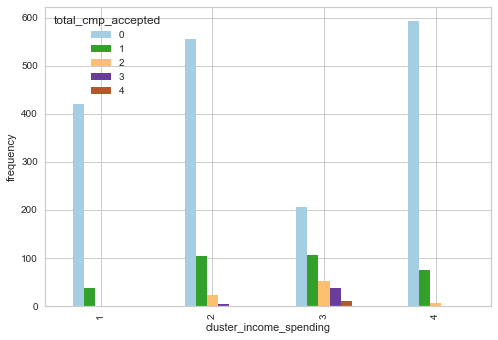

In [20]:
clst1_camp.plot(kind='bar',cmap=sns.color_palette("Paired", as_cmap=True))

plt.ylabel('frequency')
#no obvious pattern found given this way of clustering, too few clients accpted the campaigne

In [21]:
clst1_deals1 = df[['cluster_income_spending','Discount_Deal']].groupby('cluster_income_spending').agg('mean')
clst1_deals2 = df[['cluster_income_spending','Total_Deal_nondiscount']].groupby('cluster_income_spending').agg('mean')

result = pd.concat([clst1_deals1, clst1_deals2], axis=1)
result
#clst1_deals = df[['cluster_income_spending','Discount_Deal','Total_Deal_nondiscount']].groupby('cluster_income_spending').agg('count')

Discount_Deal  Total_Deal_nondiscount
cluster_income_spending                                       
1                             2.034858                5.348584
2                             2.811321               17.158200
3                             1.297821               19.537530
4                             2.657778                8.456296

<Figure size 576x396 with 0 Axes>

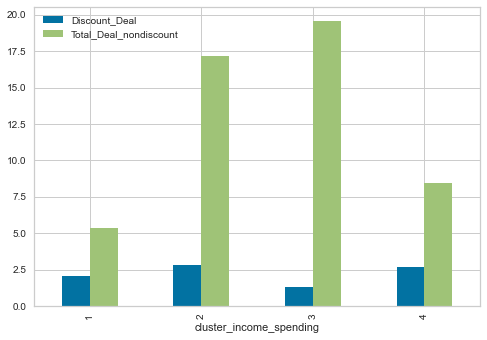

In [22]:
sns.color_palette("Paired", as_cmap=True)
plt.figure()
result.plot(kind='bar')
plt.show()

In [23]:
#sns.barplot(data=df, x='Education',y='Marital_Status',hue='cluster_income_spending')
# no obvious finding about their marital status & education

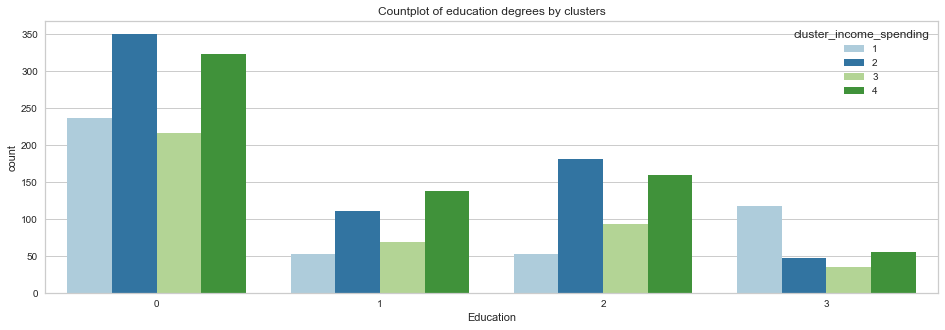

In [24]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')

sns.countplot(data=df, x='Education', hue='cluster_income_spending',palette=sns.color_palette('Paired', n_colors=4))

plt.show()

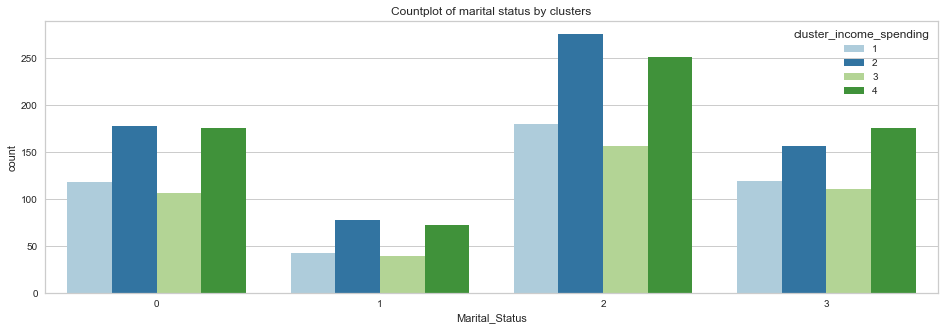

In [25]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of marital status by clusters')
sns.countplot(data=df, x='Marital_Status', hue='cluster_income_spending',palette=sns.color_palette('Paired', n_colors=4))
plt.show()

# 2nd cluster by PCA on people & product & place cols

In [26]:
df.columns

Index(['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Discount_Deal',
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children', 'total_cmp_accepted',
       'cluster_income_spending'],
      dtype='object')

In [27]:
df2 = df[['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children']]
df2

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0             0               3        58138.0              58    635      88   
1             0               3        46344.0              38     11       1   
2             0               0        71613.0              26    426      49   
3             0               0        26646.0              26     11       4   
4             2               2        58293.0              94    173      43   
...         ...             ...            ...             ...    ...     ...   
2231          0               2        61223.0              46    709      43   
2232          2               0        64014.0              56    406       0   
2233          0               1        56981.0              91    908      48   
2234          1               0        69245.0               8    428      30   
2235          2               2        52869.0              40     84       3   

      Meat  Fish  Sweets  Gold  Web_Deal  Catalog_Deal  Store_Deal  \
0      546   172      88    88         8            10           4   
1        6     2       1     6         1             1           2   
2      127   111      21    42         8             2          10   
3       20    10       3     5         2             0           4   
4      118    46      27    15         5             3           6   
...    ...   ...     ...   ...       ...           ...         ...   
2231   182    42     118   247         9             3           4   
2232    30     0       0     8         8             2           5   
2233   217    32      12    24         2             3          13   
2234   214    80      30    61         6             5          10   
2235    61     2       1    21         3             1           4   

      NumWebVisitsMonth  Complain  Response  Age  Client_since_(month)  \
0                     7         0         1   57                  33.2   
1                     5         0         0   60                   5.0   
2                     4         0         0   49                  16.6   
3                     6         0         0   30                   3.0   
4                     5         0         0   33                  11.5   
...                 ...       ...       ...  ...                   ...   
2231                  5         0         0   47                  18.9   
2232                  7         0         0   68                   2.9   
2233                  6         0         0   33                  11.3   
2234                  3         0         0   58                  11.4   
2235                  7         0         1   60                  26.9   

      Spending  Total_Deal_nondiscount  Children  
0         1617                      22         0  
1           27                       4         2  
2          776                      20         0  
3           53                       6         1  
4          422                      14         1  
...        ...                     ...       ...  
2231      1341                      16         1  
2232       444                      15         3  
2233      1241                      18         0  
2234       843                      21         1  
2235       172                       8         2  

[2236 rows x 21 columns]

### Clsutering using KMeans

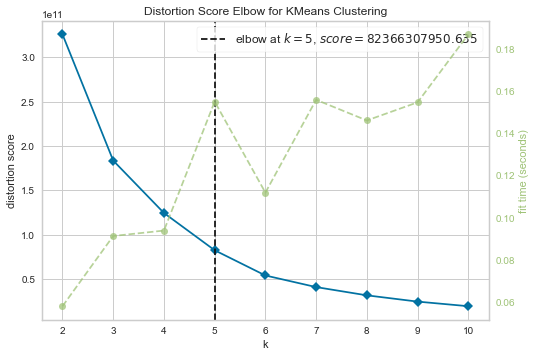

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(df2)
elbow_method.show()
# shows that k=5 is the optimal , but when I did the count of each cluster, last cluster only have 5 datapoint, so I will keep with 4 clusters

In [31]:
model = KMeans(n_clusters=4).fit(df2)
df2['cluster'] = model.predict(df2)+1
df2['cluster'].value_counts()

2    669
1    668
4    456
3    443
Name: cluster, dtype: int64

In [32]:
df['cluster'] = model.predict(df2)+1

In [33]:
pred2 = model.fit_predict(df2)
score2 = silhouette_score(df2, pred2)
score2

0.5240854497390173

In [ ]:
# to complete the csv for visualisation by adding the col of cluster
#visu = pd.read_csv('/Users/carrie/IronHack/Final_Project/Visualisation/data_clean_visu.csv').iloc[:,1:]
#visu

In [ ]:
#visu['Clusters'] = model.predict(df2)+1

In [ ]:
#visu['HasChildren'] = (visu['Children'] >= 1).astype('int64')

In [ ]:
#visu['HasChildren'] = visu['HasChildren'].replace(0, 'no')
#visu['HasChildren'] = visu['HasChildren'].replace(1, 'yes')
#visu['HasChildren'].value_counts()

In [ ]:
#visu.to_csv('/Users/carrie/IronHack/Final_Project/Visualisation/data_clean_visu_with_cluster.csv')

### PCA feature selection & visualisation of clusters

In [34]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df2)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=['pca1','pca2'])
pca_df

pca1        pca2
0      6196.752558 -952.060016
1     -5639.684213  526.060758
2     19643.121762  309.485857
3    -25330.448094   -5.918350
4      6316.791096  392.114685
...            ...         ...
2231   9272.743248 -589.411027
2232  12038.125084  434.396977
2233   5032.010777 -705.922806
2234  17278.012203  171.450584
2235    887.563066  522.877362

[2236 rows x 2 columns]

In [35]:
pca.explained_variance_ratio_.sum()

0.9999075381357619

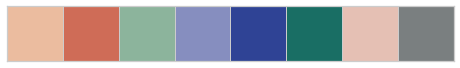

In [36]:
my_color = sns.color_palette(['#ebbc9f', '#cf6c57', '#8cb49c','#868ebf','#2f4395','#196e64','#e5c0b4','#7a7f80'])
sns.palplot(my_color)
plt.show()

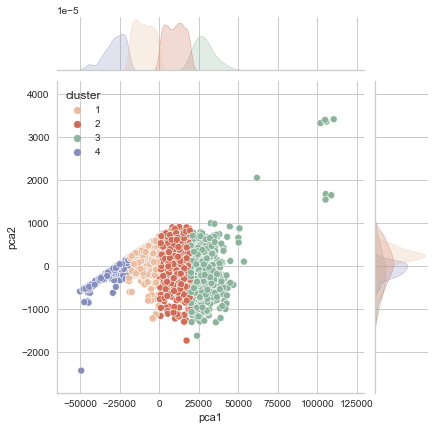

In [37]:
labels = df2['cluster']

sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels,palette=my_color[:4])

In [38]:
pca2 = PCA(n_components=3)
pca_data2 = pca2.fit_transform(df2)
pca_df2 = pd.DataFrame.from_records(data=pca_data2, columns=['pca1','pca2','pca3'])
pca_df2

pca1        pca2        pca3
0      6196.752558 -952.060016  232.642573
1     -5639.684213  526.060758  -14.201951
2     19643.121762  309.485857 -108.991833
3    -25330.448094   -5.918350   40.082719
4      6316.791096  392.114685   11.531221
...            ...         ...         ...
2231   9272.743248 -589.411027 -134.270864
2232  12038.125084  434.396977 -227.043845
2233   5032.010777 -705.922806 -273.822266
2234  17278.012203  171.450584  -37.252249
2235    887.563066  522.877362  -11.921448

[2236 rows x 3 columns]

In [39]:
import plotly.io as pio

# naming a layout theme for future reference
pio.templates["jolijoli"] = go.layout.Template(
    layout_colorway=['#ebbc9f', '#cf6c57', '#8cb49c','#868ebf','#2f4395','#196e64','#e5c0b4','#7a7f80'])

# setting Google color palette as default
pio.templates.default = "jolijoli"

In [40]:
pio.templates.default = "jolijoli"
fig = px.scatter_3d(df2, x=pca_df2['pca1'], y=pca_df2['pca2'], z=pca_df2['pca3'], color=df2['cluster'], width=800, height=800)
fig.show()

### Clsutering using Agglomerative Clustering

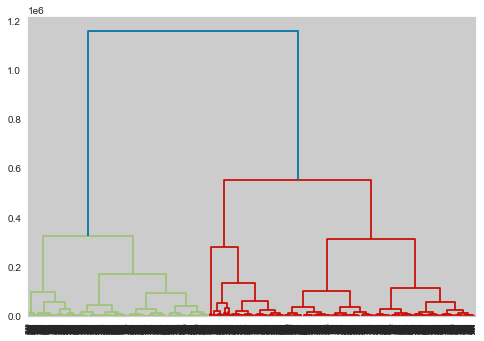

In [41]:

dendrogram = sch.dendrogram(sch.linkage(df2, method='ward'))

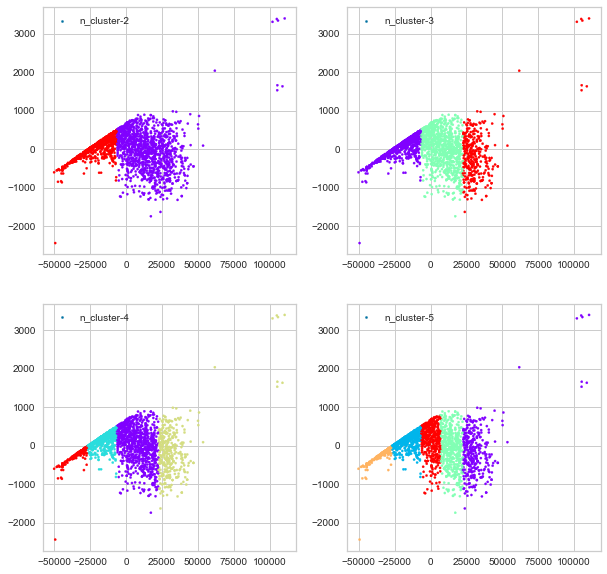

In [42]:
f = plt.figure(figsize=(10,10))
f.add_subplot(2, 2, 1)

for i in range(2, 6):
     aggloclust=AgglomerativeClustering(n_clusters=i).fit(df2)
     f.add_subplot(2, 2, i-1)
     plt.scatter(pca_df2['pca1'], pca_df2['pca2'], s=5, c=aggloclust.labels_, label="n_cluster-"+str(i),cmap='rainbow')
     plt.legend()
plt.show()

In [43]:
model_ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_ac.fit(df2)
labels_ac = model_ac.labels_
labels_ac

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
unique, counts = np.unique(labels_ac, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 956]
 [  1 668]
 [  2 369]
 [  3 243]]


In [45]:
metrics.silhouette_score(df2, model_ac.labels_)

0.48611023665296804

In [46]:
df['cluster_2_ac'] = labels_ac+1

In [47]:
df2['cluster_2_ac'] = labels_ac+1

fig = px.scatter(df2, x=pca_df2['pca1'], y=pca_df2['pca3'], color=df2['cluster_2_ac'], width=800, height=800, color_discrete_sequence=['#ebbc9f', '#cf6c57', '#8cb49c','#868ebf'])
fig.show()

In [48]:
df2.corr().iloc[:,-2:].sort_values('cluster_2_ac',ascending = False)

cluster  cluster_2_ac
cluster_2_ac            0.604683      1.000000
cluster                 1.000000      0.604683
Response                0.053859      0.095519
Meat                    0.139687      0.064344
NumWebVisitsMonth      -0.041093      0.061749
Education               0.041243      0.045705
Complain               -0.009231      0.013621
Recency_(days)         -0.005737      0.012461
Sweets                  0.108994      0.008827
Marital_Status          0.012006      0.007015
Fish                    0.098181      0.001440
Fruits                  0.098704     -0.004483
Client_since_(month)    0.008075     -0.008582
Catalog_Deal            0.070880     -0.053792
Spending                0.086787     -0.070230
Gold                   -0.008760     -0.125096
Wines                   0.021915     -0.150161
Children               -0.265738     -0.183814
Age                    -0.166574     -0.219121
Total_Deal_nondiscount -0.046029     -0.243423
Yearly_Income          -0.117759     -0.248597
Store_Deal             -0.055423     -0.262485
Web_Deal               -0.129054     -0.267480

In [49]:
fig = px.scatter_3d(df2, x=df2['Total_Deal_nondiscount'], y=df2['Spending'], z=df2['Yearly_Income'], color=df2['cluster_2_ac'], width=800, height=800)
fig.show()

In [50]:
fig = px.scatter(df2, x=df2['Yearly_Income'], y=df2['Spending'], color=df2['cluster_2_ac'], width=800, height=800,color_discrete_sequence=['#ebbc9f', '#cf6c57', '#8cb49c','#868ebf'])
fig.show()

#### GMM

In [51]:
for i in range(3,9):
    gmm = GaussianMixture(n_components=i, random_state=0)
    gmm.fit(df2)
    print(f'num of cluster: {i}, score: {silhouette_score(df2, gmm.predict(df2))}')

num of cluster: 3, score: 0.33567869294944025
num of cluster: 4, score: 0.517608886615505
num of cluster: 5, score: 0.32415360937138904
num of cluster: 6, score: 0.34001602670541786
num of cluster: 7, score: 0.31014872392415305
num of cluster: 8, score: 0.2732887306158303


In [52]:
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(df2)

labels_gmm = gmm.predict(df2)

df['cluster_gmm'] = labels_gmm
df['cluster_gmm'].value_counts()

3    683
0    654
2    456
1    443
Name: cluster_gmm, dtype: int64

#### DBSCAN

In [53]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df2)
distances, indices = nbrs.kneighbors(df2)

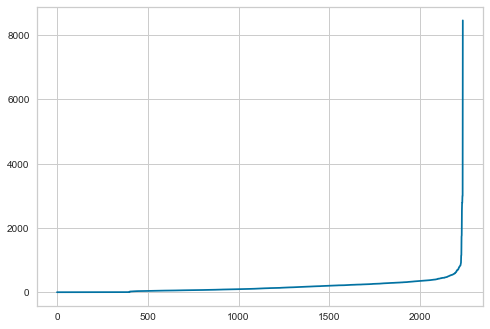

In [54]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

(200.0, 1000.0)

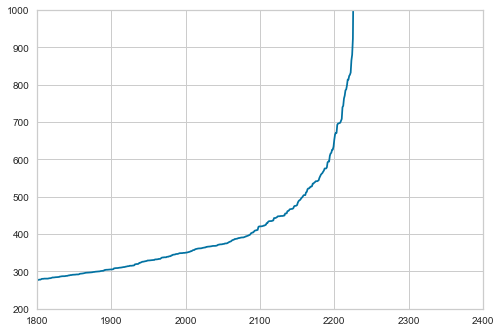

In [55]:
distances, indices = nbrs.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim([1800, 2400])
plt.ylim([200, 1000])

In [56]:
for i in range(2,8):
    m = DBSCAN(eps=850, min_samples=i)
    print(f'num of cluster: {i}, score: {silhouette_score(df2, m.fit_predict(df2))}')

num of cluster: 2, score: 0.06045648926629784
num of cluster: 3, score: 0.05807167331699532
num of cluster: 4, score: 0.05772046245391226
num of cluster: 5, score: 0.05471614123031963
num of cluster: 6, score: 0.003812144025873493
num of cluster: 7, score: 0.02890384712270761


In [57]:
lst = [['KMeans','4', 0.524], ['Agglomerative Clustering', '4', 0.486],
       ['Gaussian Mixture', '4', 0.524], ['DBSCAN', '3', 0.058]]
    
models_results = pd.DataFrame(lst, columns =['Model', 'No. of Clusters', 'Silhouette Score'], dtype = float)
models_results['No. of Clusters']=models_results['No. of Clusters'].astype(int)
models_results

Model  No. of Clusters  Silhouette Score
0                    KMeans                4             0.524
1  Agglomerative Clustering                4             0.486
2          Gaussian Mixture                4             0.524
3                    DBSCAN                3             0.058

#### KMeans have a better silouette score at 0.524, so KMeans clustter is better, I will find the pattern for each cluster for KMeans 

### Find cluster pattern: Clusters_2_KMeans analysis

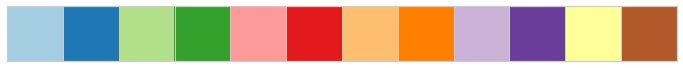

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
current_palette = sns.color_palette('Paired')
sns.palplot(current_palette)
plt.show()

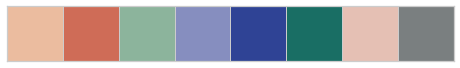

In [59]:
my_color = sns.color_palette(['#ebbc9f', '#cf6c57','#8cb49c','#868ebf', '#2f4395','#196e64','#e5c0b4','#7a7f80'])
sns.palplot(my_color)
plt.show()

In [60]:
df2['cluster'].value_counts()

2    669
1    668
4    456
3    443
Name: cluster, dtype: int64

In [61]:
fig = px.pie(df2['cluster'].value_counts().reset_index(), values = 'cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#ebbc9f', '#cf6c57', '#2f4395','#196e64'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clients: %{value}')

fig.update_layout(annotations = [dict(text = 'Number of customers <br>by cluster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

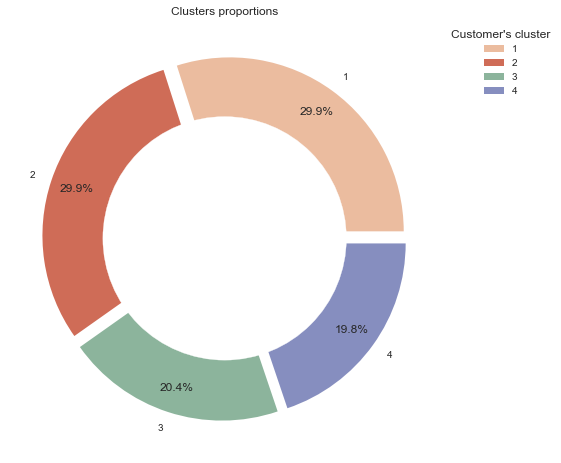

In [62]:
sizes = dict(df2['cluster'].value_counts())

explodes= (0.05,0.05,0.05,0.05)


plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, colors=my_color,explode = explodes)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [63]:
df2.columns

Index(['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web_Deal',
       'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth', 'Complain',
       'Response', 'Age', 'Client_since_(month)', 'Spending',
       'Total_Deal_nondiscount', 'Children', 'cluster', 'cluster_2_ac'],
      dtype='object')

In [64]:
df2['MntTotal'] = df2['Wines']+df2['Meat']+df2['Fruits']+df2['Fish']+df2['Sweets']+df2['Gold']

In [65]:
df2 = df2.assign(
        percentWines=lambda x: x['Wines'] / x['MntTotal'] * 100,
        percentMeat=lambda x: x['Meat'] / x['MntTotal'] * 100,
        percentFruits=lambda x: x['Fruits'] / x['MntTotal'] * 100,
        percentFish=lambda x: x['Fish'] / x['MntTotal'] * 100,
        percentSweets=lambda x: x['Sweets'] / x['MntTotal'] * 100,
        percentGold=lambda x: x['Gold'] / x['MntTotal'] * 100,
)

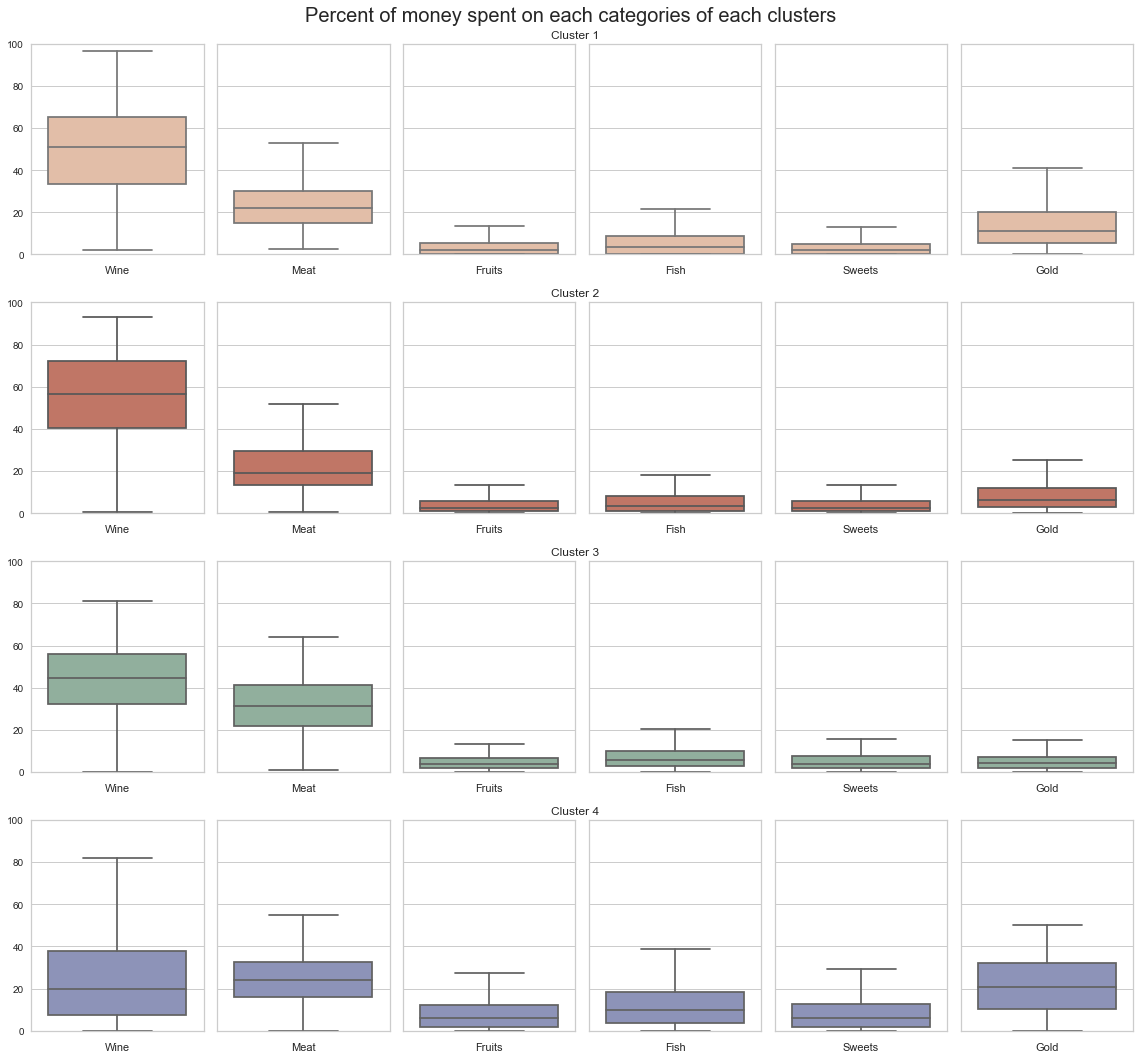

In [66]:
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Percent of money spent on each categories of each clusters', fontsize=20)
PALETTE=my_color

for i, value in enumerate(sorted(df2['cluster'].unique())):
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentWines', showfliers=False, color=PALETTE[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentMeat', showfliers=False, color=PALETTE[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentFruits', showfliers=False, color=PALETTE[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'Cluster {value}', x=1)

    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentFish', showfliers=False, color=PALETTE[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentSweets', showfliers=False, color=PALETTE[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=df2.query(f'cluster == {value}'), y='percentGold', showfliers=False, color=PALETTE[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()


#### As we see, popular products types are the same in all clusters: wine and meat. But cluster 1 buys Meat more than others. 

#### Cluster 3 spend most in Gold products within 4 clusters

#### Cluster 4, 2, 1 spent quite much in Wine products (propotionally in total spendings)

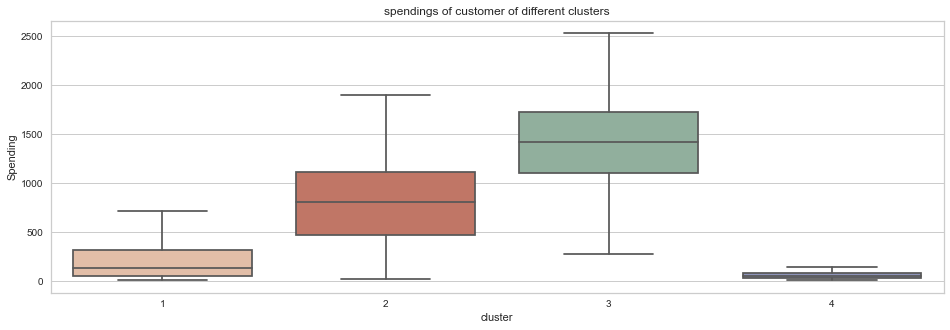

In [111]:
plt.figure(figsize=(16,5))
plt.title(f'spendings of customer of different clusters')
ax = sns.boxplot(data=df2, x='cluster', y='Spending', palette=PALETTE, showfliers=False)
plt.show()

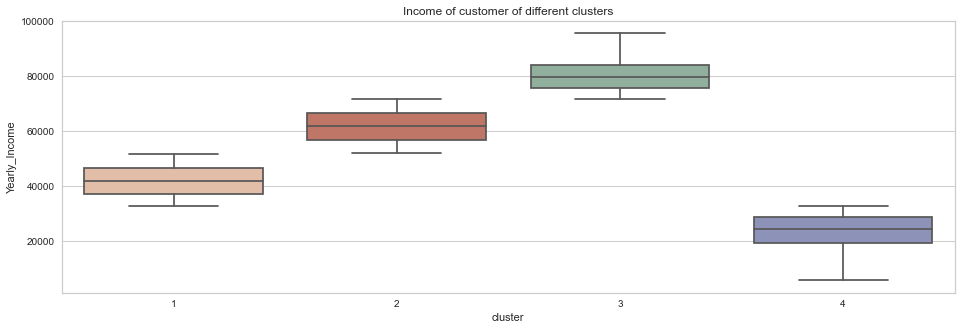

In [68]:
plt.figure(figsize=(16,5))
plt.title(f'Income of customer of different clusters')
ax = sns.boxplot(data=df2, x='cluster', y='Yearly_Income', palette=PALETTE, showfliers=False)
plt.show()

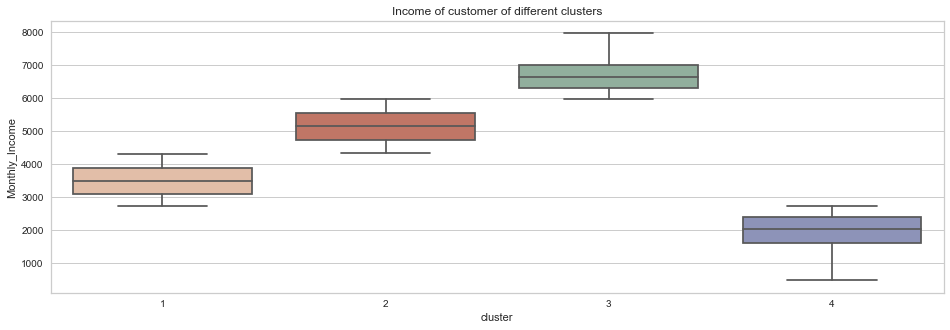

In [69]:
plt.figure(figsize=(16,5))
plt.title(f'Income of customer of different clusters')
ax = sns.boxplot(data=df2, x='cluster', y=df2['Yearly_Income']/12, palette=PALETTE, showfliers=False)
ax.set(ylabel='Monthly_Income')
plt.show()

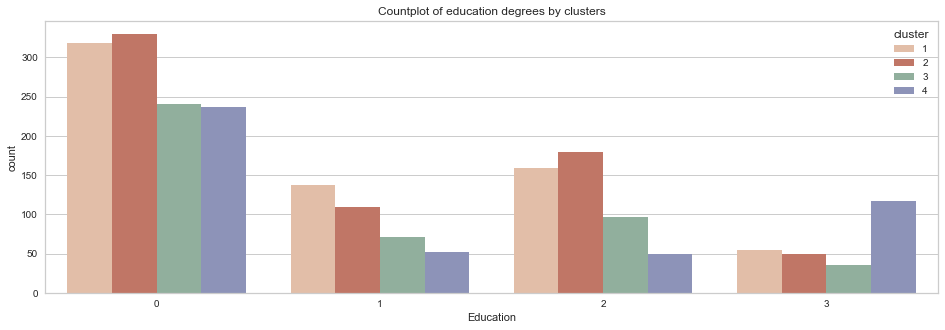

In [70]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df2, x='Education', hue='cluster', palette=PALETTE)
plt.show()
# {'Bachelor': 0, 'Master': 1, 'PhD': 2, 'Undergraduate': 3}

#### there are most undergraduate in cluster 3

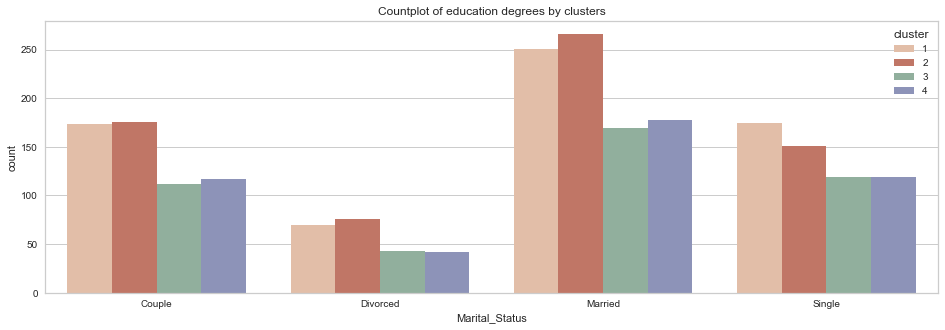

In [71]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df2, x='Marital_Status', hue='cluster', palette=PALETTE)
marital_labels=['Couple','Divorced','Married','Single']
plt.xticks([0,1,2,3],marital_labels)
plt.show()
# {'Couple': 0, 'Divorced': 1, 'Married': 2, 'Single': 3}

#### no obvious pattern in marital status for clusters

In [72]:
df2.Children.value_counts()

1    1125
0     637
2     421
3      53
Name: Children, dtype: int64

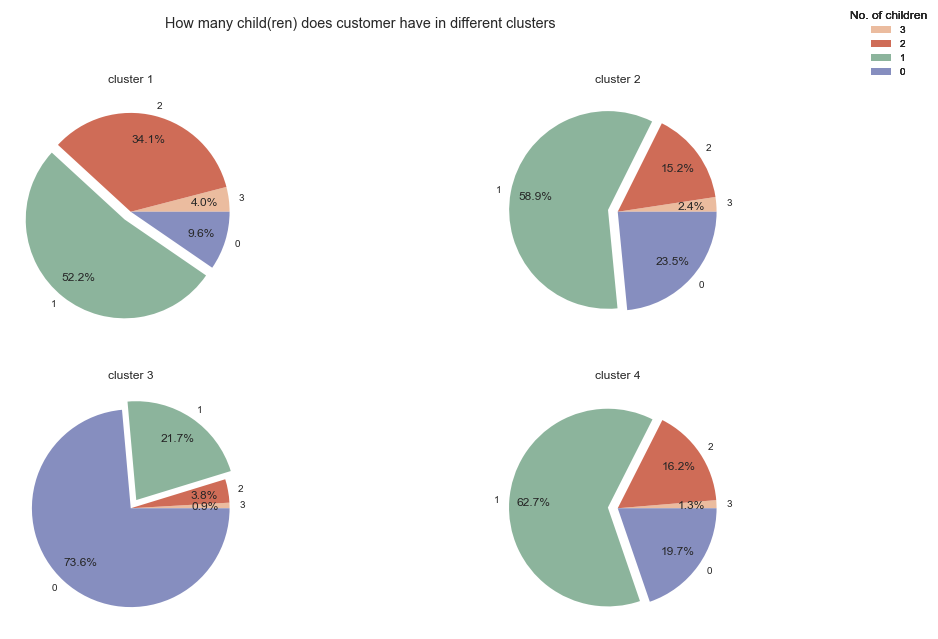

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
Explode = (0., 0., 0.1,0)

for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(df2.query(f'cluster == {k}')['Children'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), explode=Explode,labels=list(sizes.keys()), autopct="%.1f%%", pctdistance=0.75, colors=PALETTE)
        fig.legend(title="No. of children", labels=['3', '2','1','0'], bbox_to_anchor=(1, 1)) 

fig.suptitle('How many child(ren) does customer have in different clusters')
fig.show()

#### There are mostly parents in 2, 3, 4 clusters. And most customers in 1st cluster have no child

In [74]:
# verify if the gragh is well calculated to avoid any mistake
size_check = dict(df2.query(f'cluster == 4')['Children'].value_counts().sort_index(ascending=False))
size_check

{3: 6, 2: 74, 1: 286, 0: 90}

In [75]:
size_total = sum(size_check.values())
size_total

456

In [76]:
for k,v in size_check.items():
    percent = round((v/size_total)*100,1)
    print(f'{k} child(ren) consist of {percent} % of total in cluster 4')
# the gragh is corresponding to the calculation 

3 child(ren) consist of 1.3 % of total in cluster 4
2 child(ren) consist of 16.2 % of total in cluster 4
1 child(ren) consist of 62.7 % of total in cluster 4
0 child(ren) consist of 19.7 % of total in cluster 4


In [77]:
df2.head()

Education  Marital_Status  Yearly_Income  Recency_(days)  Wines  Fruits  \
0          0               3        58138.0              58    635      88   
1          0               3        46344.0              38     11       1   
2          0               0        71613.0              26    426      49   
3          0               0        26646.0              26     11       4   
4          2               2        58293.0              94    173      43   

   Meat  Fish  Sweets  Gold  Web_Deal  Catalog_Deal  Store_Deal  \
0   546   172      88    88         8            10           4   
1     6     2       1     6         1             1           2   
2   127   111      21    42         8             2          10   
3    20    10       3     5         2             0           4   
4   118    46      27    15         5             3           6   

   NumWebVisitsMonth  Complain  Response  Age  Client_since_(month)  Spending  \
0                  7         0         1   57                  33.2      1617   
1                  5         0         0   60                   5.0        27   
2                  4         0         0   49                  16.6       776   
3                  6         0         0   30                   3.0        53   
4                  5         0         0   33                  11.5       422   

   Total_Deal_nondiscount  Children  cluster  cluster_2_ac  MntTotal  \
0                      22         0        2             1      1617   
1                       4         2        1             1        27   
2                      20         0        2             1       776   
3                       6         1        4             2        53   
4                      14         1        2             1       422   

   percentWines  percentMeat  percentFruits  percentFish  percentSweets  \
0     39.270254    33.766234       5.442177    10.636982       5.442177   
1     40.740741    22.222222       3.703704     7.407407       3.703704   
2     54.896907    16.365979       6.314433    14.304124       2.706186   
3     20.754717    37.735849       7.547170    18.867925       5.660377   
4     40.995261    27.962085      10.189573    10.900474       6.398104   

   percentGold  
0     5.442177  
1    22.222222  
2     5.412371  
3     9.433962  
4     3.554502

In [78]:
df2.filter(regex='_Deal$',axis=1).sum(axis=0)

Web_Deal         9140
Catalog_Deal     5955
Store_Deal      12959
dtype: int64

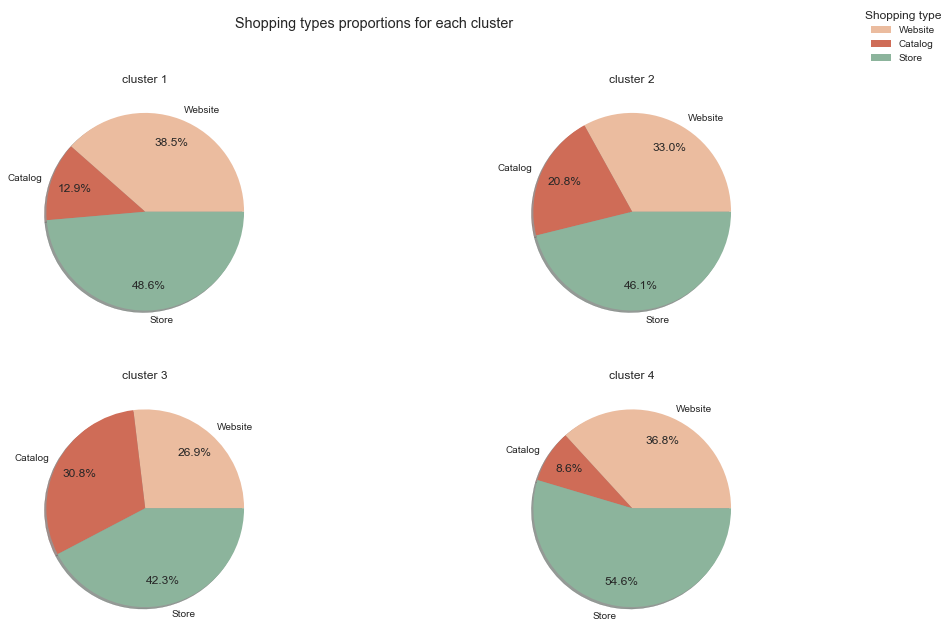

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = df2.query(f'cluster == {k}').filter(regex='_Deal$',axis=1).sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Shopping types proportions for each cluster')
fig.legend(title="Shopping type", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1)) 
fig.show()


#### most people in each clusters buy from store. Customers from 1st and 2nd clusters buy from catalog more than from 1 and 4 clusters. 

#### Maybe catalog products are more expensive, if want to do campaigne about catalogue products, better to target 1st and 2nd clusters customers

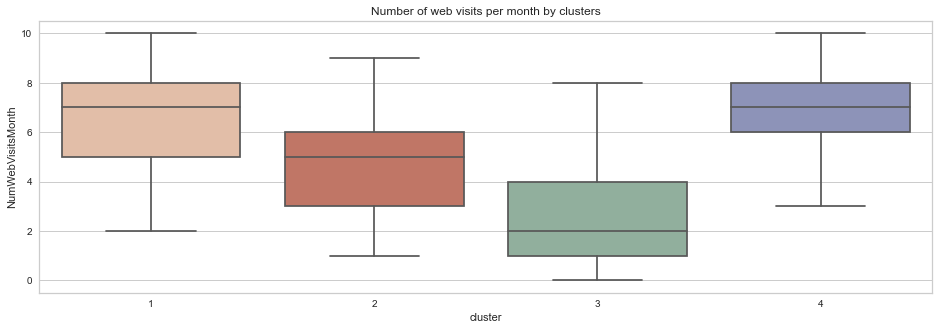

In [80]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=df2, x='cluster', y='NumWebVisitsMonth', palette=PALETTE, showfliers=False)
plt.show()

#### 2nd and 3rd clusters visits the website the most, will be good to target them in website campaignes

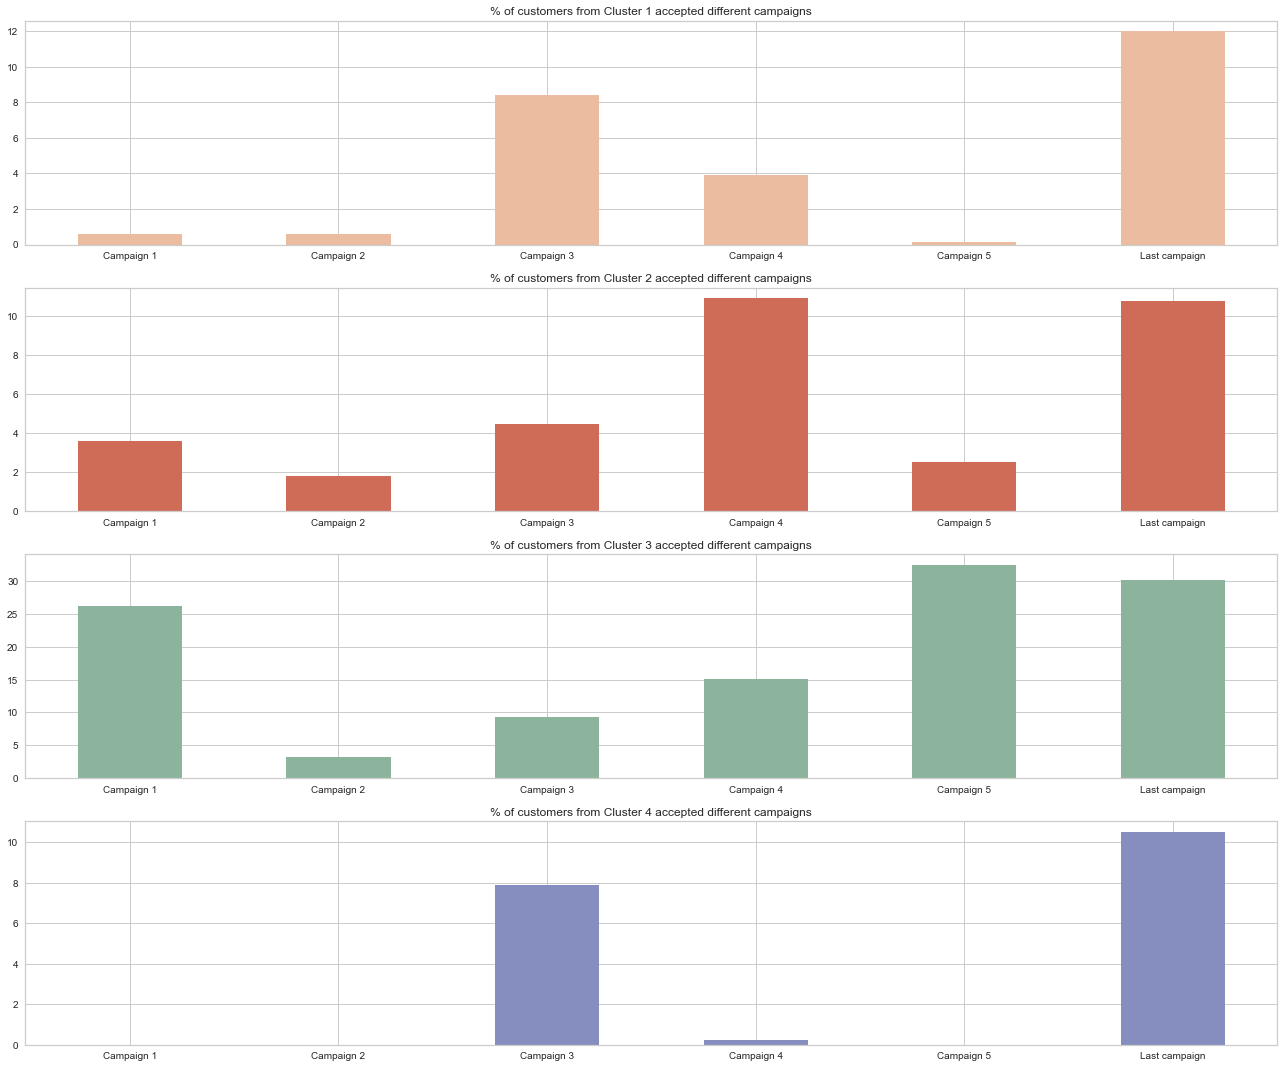

In [81]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20))

for i in range(1, 5):
    ax = (df.query(f'cluster == {i}')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
          .sum() 
          .divide(df.query(f'cluster == {i}').shape[0]).multiply(100)
          .plot(kind='bar', figsize=(18,15), title=f'% of customers from Cluster {i} accepted different campaigns', ax=axes[i-1], color=PALETTE[i-1]))
    ax.set_xticklabels(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last campaign'], rotation=0)
    
plt.tight_layout()

#### Campaign wise:
The biggest interest in campaign 1: Cluster 2 \
Campaign 2 acceptance in relatively low in any cluster\
The biggest interest in campaign 3 showed Cluster 1 & 3\
Campaign 4 was relatively successful in all clusters besides Cluster 3\
The biggest interest in campaign 5 showed Cluster 2\
The last campaign was succesfull in all clusters

#### Cluster wise:
cluster 2 & 4 accepted more campaignes than other 2 clusters

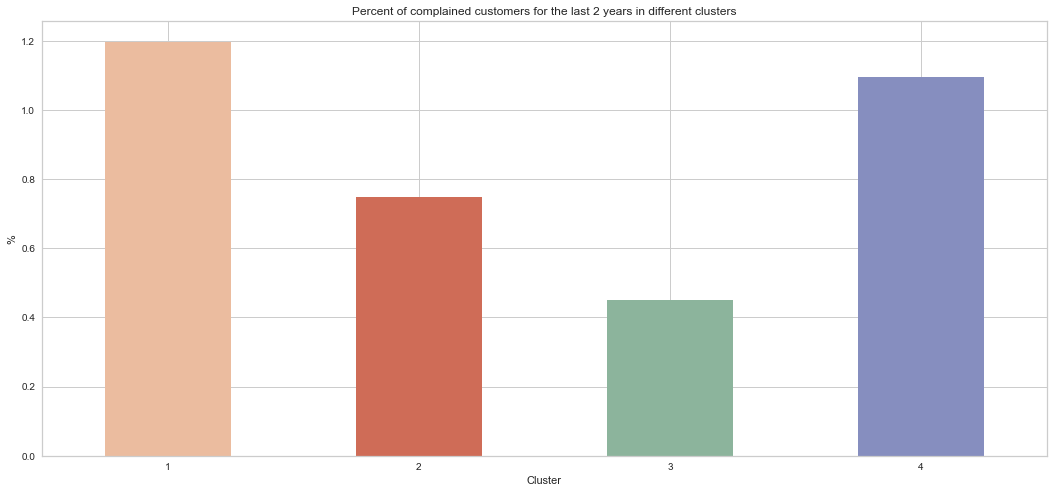

In [82]:
complains_by_cluster = (df2.groupby(by='cluster')['Complain'].sum()
                                      .divide(df2['cluster'].value_counts())
                                      .multiply(100))

ax = complains_by_cluster.plot(kind='bar', figsize=(18, 8), color=PALETTE[:4], 
                               title='Percent of complained customers for the last 2 years in different clusters',
                               ylabel='%', xlabel='Cluster')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

#### cluster 3 spent the least, but they has the 2nd most complaints

In [83]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 55, 80]
df2['Age_group'] = pd.cut(df2['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Recency = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
df2['Income_group'] = pd.qcut(df2['Recency_(days)'], q=4, labels=cut_labels_Recency)
#Create Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
df2['Seniority_group'] = pd.qcut(df2['Client_since_(month)'], q=4, labels=cut_labels_Seniority)

In [89]:
cut_labels_Recency = ['Low spending', 'Low to medium spending', 'Medium to high spending', 'High spending']
df2['Spending_group'] = pd.qcut(df2['Spending'], q=4, labels=cut_labels_Recency)

In [92]:
cut_labels_Recency = ['Not Frequent', 'Low to medium Frequent', 'Medium to high Frequent', 'Very Frequent']
df2['Recency_group'] = pd.qcut(df2['Recency_(days)'], q=4, labels=cut_labels_Recency)

In [93]:
df2[['Age_group','Recency_group','Seniority_group','Spending_group']]

Age_group            Recency_group        Seniority_group  \
0       Senior  Medium to high Frequent          Old customers   
1       Senior   Low to medium Frequent          New customers   
2       Mature   Low to medium Frequent  Discovering customers   
3        Young   Low to medium Frequent          New customers   
4        Adult            Very Frequent          New customers   
...        ...                      ...                    ...   
2231    Mature   Low to medium Frequent  Experienced customers   
2232    Senior  Medium to high Frequent          New customers   
2233     Adult            Very Frequent          New customers   
2234    Senior             Not Frequent          New customers   
2235    Senior   Low to medium Frequent          Old customers   

               Spending_group  
0               High spending  
1                Low spending  
2     Medium to high spending  
3                Low spending  
4     Medium to high spending  
...                       ...  
2231            High spending  
2232  Medium to high spending  
2233            High spending  
2234  Medium to high spending  
2235   Low to medium spending  

[2236 rows x 4 columns]

In [94]:
df2['Recency_group'].value_counts()

Medium to high Frequent    567
Not Frequent               565
Low to medium Frequent     554
Very Frequent              550
Name: Recency_group, dtype: int64

In [104]:
df2.query(f'cluster == 4')['Recency_group'].value_counts()

Not Frequent               121
Very Frequent              121
Low to medium Frequent     117
Medium to high Frequent     97
Name: Recency_group, dtype: int64

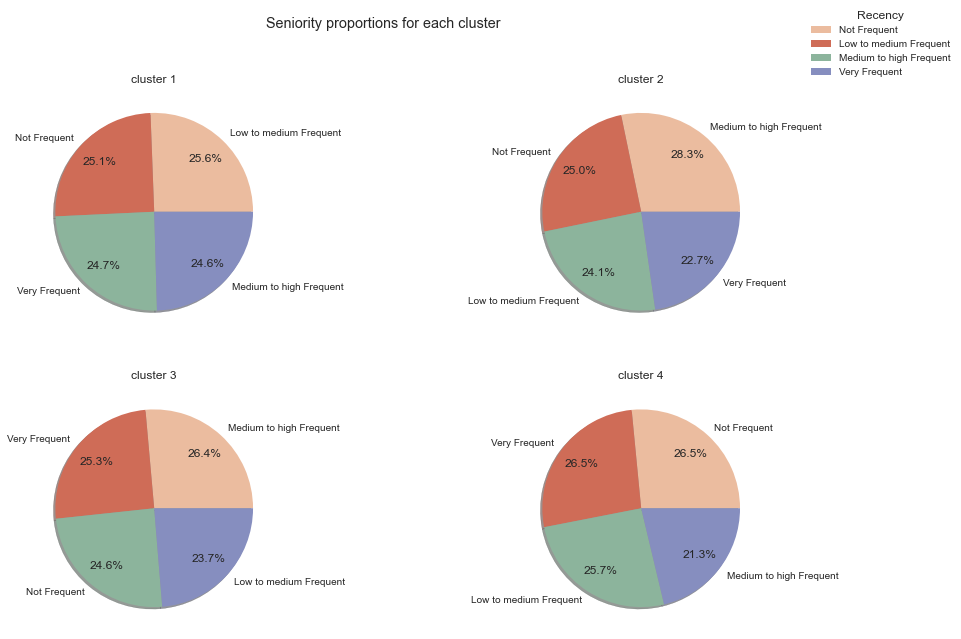

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = df2.query(f'cluster == {k}')['Recency_group'].value_counts()
        sizes = dict(num)
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=num.index, autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=PALETTE)

fig.suptitle('Seniority proportions for each cluster')
fig.legend(title="Recency", labels=['Not Frequent', 'Low to medium Frequent', 'Medium to high Frequent', 'Very Frequent'], bbox_to_anchor=(1, 1)) 
fig.show()

In [95]:
df2.query(f'cluster == 3')['Age_group'].value_counts()

Adult     167
Senior    128
Mature     90
Young      58
Name: Age_group, dtype: int64

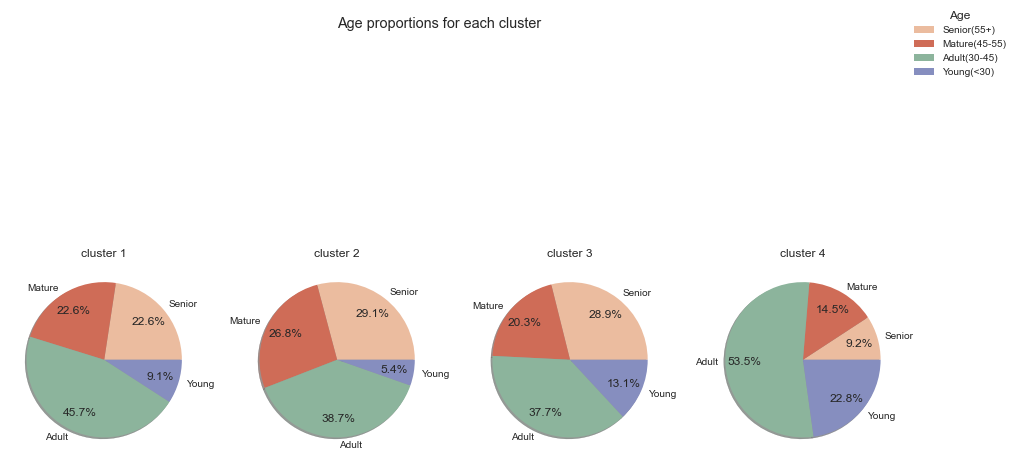

In [130]:
fig, axes = plt.subplots(1, 4, figsize=(16, 10))   
k = 0
for i in range(4):
        k += 1
        sizes = dict(df2.query(f'cluster == {k}')['Age_group'].value_counts().sort_index(ascending=False))
        axes[i].set_title(f"cluster {k}")
        axes[i].pie(sizes.values(), labels=list(sizes.keys()), autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=my_color)

fig.suptitle('Age proportions for each cluster')
fig.legend(title="Age", labels=['Senior(55+)', 'Mature(45-55)','Adult(30-45)','Young(<30)'], bbox_to_anchor=(1, 1)) 
fig.show()


In [97]:
df2.query(f'cluster == 4')['Income_group'].value_counts()

Low income               121
High income              121
Low to medium income     117
Medium to high income     97
Name: Income_group, dtype: int64

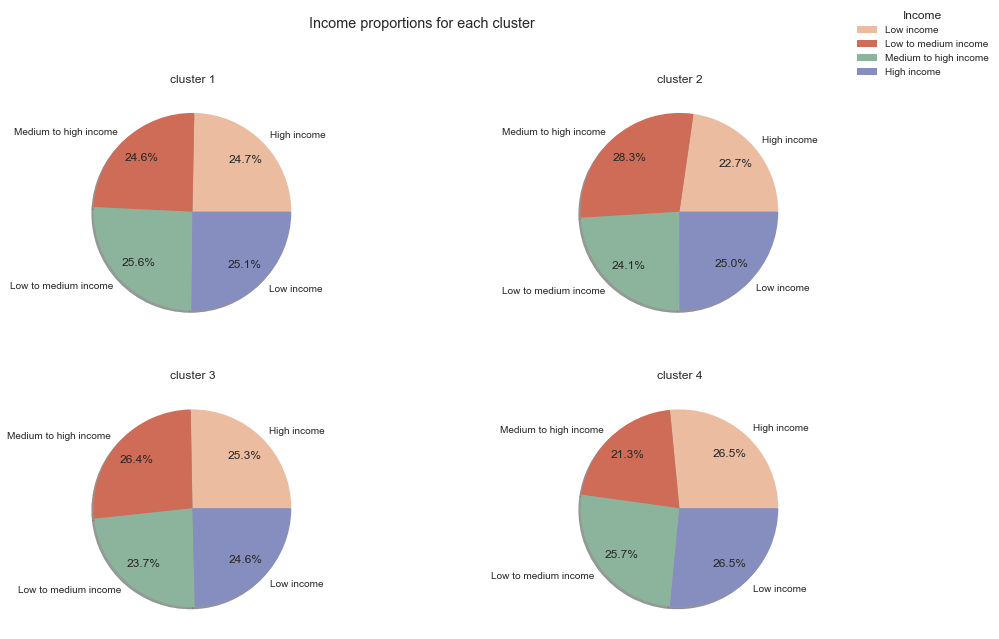

In [119]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(df2.query(f'cluster == {k}')['Income_group'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=list(sizes.keys()), autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=my_color)

fig.suptitle('Income proportions for each cluster')
fig.show()
fig.legend(title="Income", labels=['Low income', 'Low to medium income', 'Medium to high income', 'High income'], bbox_to_anchor=(1, 1)) 
fig.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
Explode = (0., 0., 0.1,0)

for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(df2.query(f'cluster == {k}')['Children'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), explode=Explode,labels=list(sizes.keys()), autopct="%.1f%%", pctdistance=0.75, colors=PALETTE)
        fig.legend(title="No. of children", labels=['3', '2','1','0'], bbox_to_anchor=(1, 1)) 

fig.suptitle('How many child(ren) does customer have in different clusters')
fig.show()

In [116]:
df2.query(f'cluster == {3}')['Spending_group'].value_counts().sort_index(ascending=False)

High spending              351
Medium to high spending     87
Low to medium spending       2
Low spending                 3
Name: Spending_group, dtype: int64

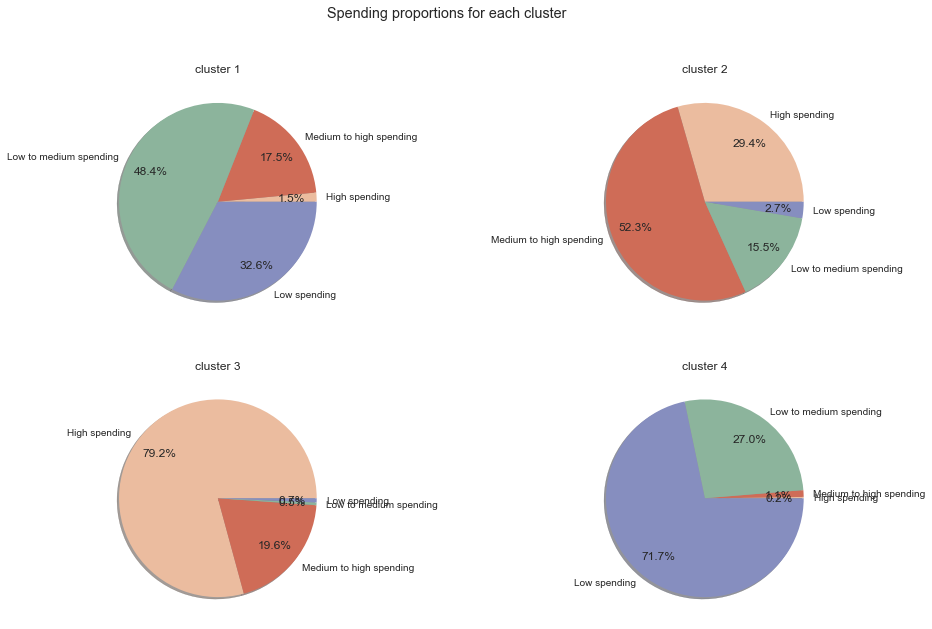

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(df2.query(f'cluster == {k}')['Spending_group'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(), labels=list(sizes.keys()), autopct="%.1f%%", pctdistance=0.75, shadow=True, colors=my_color)

fig.suptitle('Spending proportions for each cluster')
fig.show()

In [100]:
df2.query(f'cluster == 4')['Seniority_group'].value_counts()

Old customers            121
New customers            114
Experienced customers    114
Discovering customers    107
Name: Seniority_group, dtype: int64

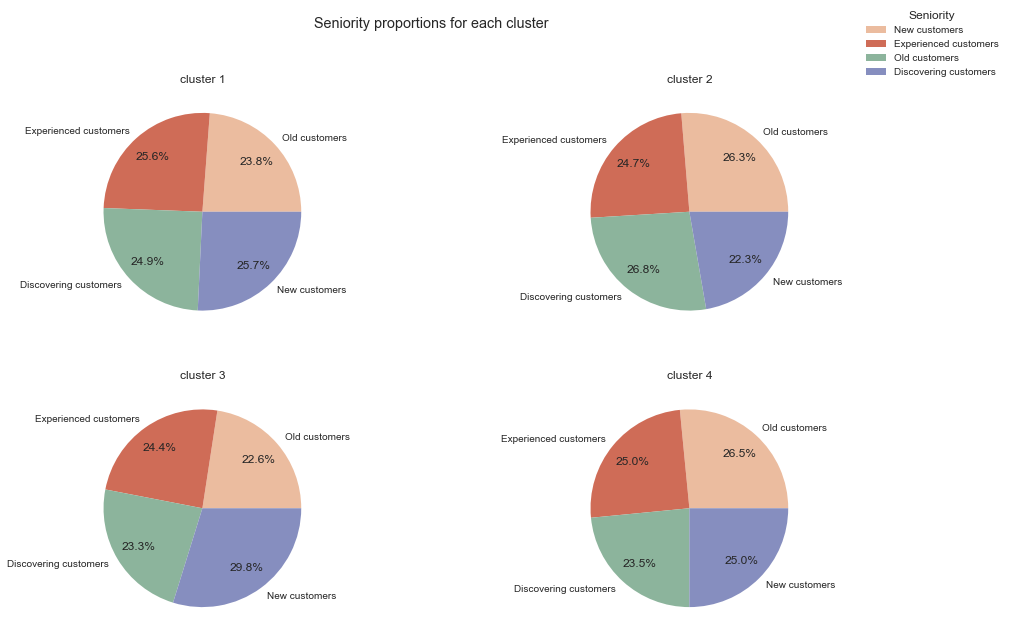

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        sizes = dict(df2.query(f'cluster == {k}')['Seniority_group'].value_counts().sort_index(ascending=False))
        axes[i, j].set_title(f"cluster {k}")
        axes[i, j].pie(sizes.values(),labels=list(sizes.keys()), autopct="%.1f%%", pctdistance=0.75, colors=PALETTE)

fig.suptitle('Seniority proportions for each cluster')
fig.legend(title="Seniority", labels=['New customers', 'Experienced customers', 'Old customers','Discovering customers'], bbox_to_anchor=(1, 1)) 
fig.show()

### check for scalling

In [ ]:
df3 = scaled_data[['Education', 'Marital_Status', 'Yearly_Income', 'Recency_(days)',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 
       'Web_Deal', 'Catalog_Deal', 'Store_Deal', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Client_since_(month)',
       'Spending', 'Total_Deal_nondiscount', 'Children']]
df3

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(scaled_data)
elbow_method.show()

In [ ]:
model3 = KMeans(n_clusters=5).fit(scaled_data)
scaled_data['cluster_3'] = model3.predict(scaled_data)+1
scaled_data['cluster_3'].value_counts()

In [ ]:
pred3 = model3.fit_predict(scaled_data)

score3 = silhouette_score(scaled_data, pred3)
score3

In [ ]:
# the scaled data is not very ideal, so we are not gonna scale it

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df3)
pca_df = pd.DataFrame.from_records(data=pca_data, columns=['pca1','pca2'])
pca_df

In [ ]:
labels = df['cluster']
sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels,palette=PALETTE[:4])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
normalized_dataset = scaler.transform(data)

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(normalized_dataset)
elbow_method.show()

In [ ]:
model4 = KMeans(n_clusters=4).fit(normalized_dataset)
scaled_data['cluster_4'] = model4.predict(normalized_dataset)+1
scaled_data['cluster_4'].value_counts()

In [ ]:
pred4 = model4.fit_predict(normalized_dataset)

score4 = silhouette_score(normalized_dataset, pred4)
score4

In [ ]:
labels = scaled_data['cluster_4']
sns.jointplot(data=pca_df, x='pca1', y='pca2', hue=labels,palette=PALETTE[:4])

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(data)
robust_df = pd.DataFrame(robust_df, columns =data.columns)
robust_df

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(robust_df)
elbow_method.show()

In [ ]:
model5 = KMeans(n_clusters=4).fit(normalized_dataset)
scaled_data['cluster_5'] = model5.predict(robust_df)+1
scaled_data['cluster_5'].value_counts()

In [ ]:
pred5 = model5.fit_predict(robust_df)
score5 = silhouette_score(robust_df, pred5)
score5